In [5]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
# You need to find the correct filename from the 'secareanualin/football-events' dataset.
# A common filename might be 'events.csv' or similar.
# For example, if the file is 'events.csv':
file_path = "events.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "secareanualin/football-events",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-2092851660.py:13: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 20.8M/20.8M [00:00<00:00, 56.3MB/s]

Extracting zip of events.csv...


First 5 records:      id_odsp   id_event  sort_order  time  \
0  UFot0hit/  UFot0hit1           1     2   
1  UFot0hit/  UFot0hit2           2     4   
2  UFot0hit/  UFot0hit3           3     4   
3  UFot0hit/  UFot0hit4           4     7   
4  UFot0hit/  UFot0hit5           5     7   

                                                text  event_type  event_type2  \
0  Attempt missed. Mladen Petric (Hamburg) left f...           1         12.0   
1  Corner,  Borussia Dortmund. Conceded by Dennis...           2          NaN   
2  Corner,  Borussia Dortmund. Conceded by Heiko ...           2          NaN   
3           Foul by Sven Bender (Borussia Dortmund).           3          NaN   
4  Gokhan Tore (Hamburg) wins a free kick in the ...           8          NaN   

   side         event_team           opponent  ... player_in player_out  \
0     2         Hamburg SV  Borussia Dortmund  ...       NaN        NaN   
1     1  Borussia Dortmund         Hamburg SV  ...       NaN        NaN   


# Task
Analyze the numerical relationships within the `df` DataFrame by preparing the numerical data, calculating and visualizing the correlation matrix, generating regression curves for interesting pairs of variables, and then summarizing the observed relationships.

## Préparer les données numériques

### Subtask:
Sélectionner les colonnes numériques de la DataFrame `df` et gérer les valeurs manquantes si nécessaire pour le calcul de la corrélation et des régressions.


**Reasoning**:
I need to select all numeric columns from the DataFrame `df` and store them in a new DataFrame called `df_numeric`. Then, I will remove any rows from `df_numeric` that contain missing values, as specified in the instructions.



In [6]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric = df_numeric.dropna()
print("Shape of the numeric DataFrame after dropping NaNs:", df_numeric.shape)
print("First 5 records of df_numeric:", df_numeric.head())

Shape of the numeric DataFrame after dropping NaNs: (167193, 13)
First 5 records of df_numeric:     sort_order  time  event_type  event_type2  side  shot_place  shot_outcome  \
0            1     2           1         12.0     2         6.0           2.0   
11          12    14           1         12.0     1        13.0           2.0   
13          14    17           1         12.0     1         4.0           1.0   
18          19    25           1         12.0     1         7.0           4.0   
22          23    26           1         12.0     1         5.0           1.0   

    is_goal  location  bodypart  assist_method  situation  fast_break  
0         0       9.0       2.0              1        1.0           0  
11        0      15.0       1.0              1        1.0           0  
13        1       9.0       2.0              1        1.0           0  
18        0       3.0       1.0              1        1.0           0  
22        0       3.0       3.0              2        1.0

## Calculer et visualiser la matrice de corrélation

### Subtask:
Calculer la matrice de corrélation entre toutes les colonnes numériques pertinentes et la visualiser à l'aide d'une carte de chaleur (heatmap) pour identifier les relations.


**Reasoning**:
I need to calculate the correlation matrix for `df_numeric`, then visualize it as a heatmap using `seaborn` and `matplotlib.pyplot` as per the instructions. This involves importing the libraries, calculating the correlation, and then plotting it with annotations and a descriptive title.



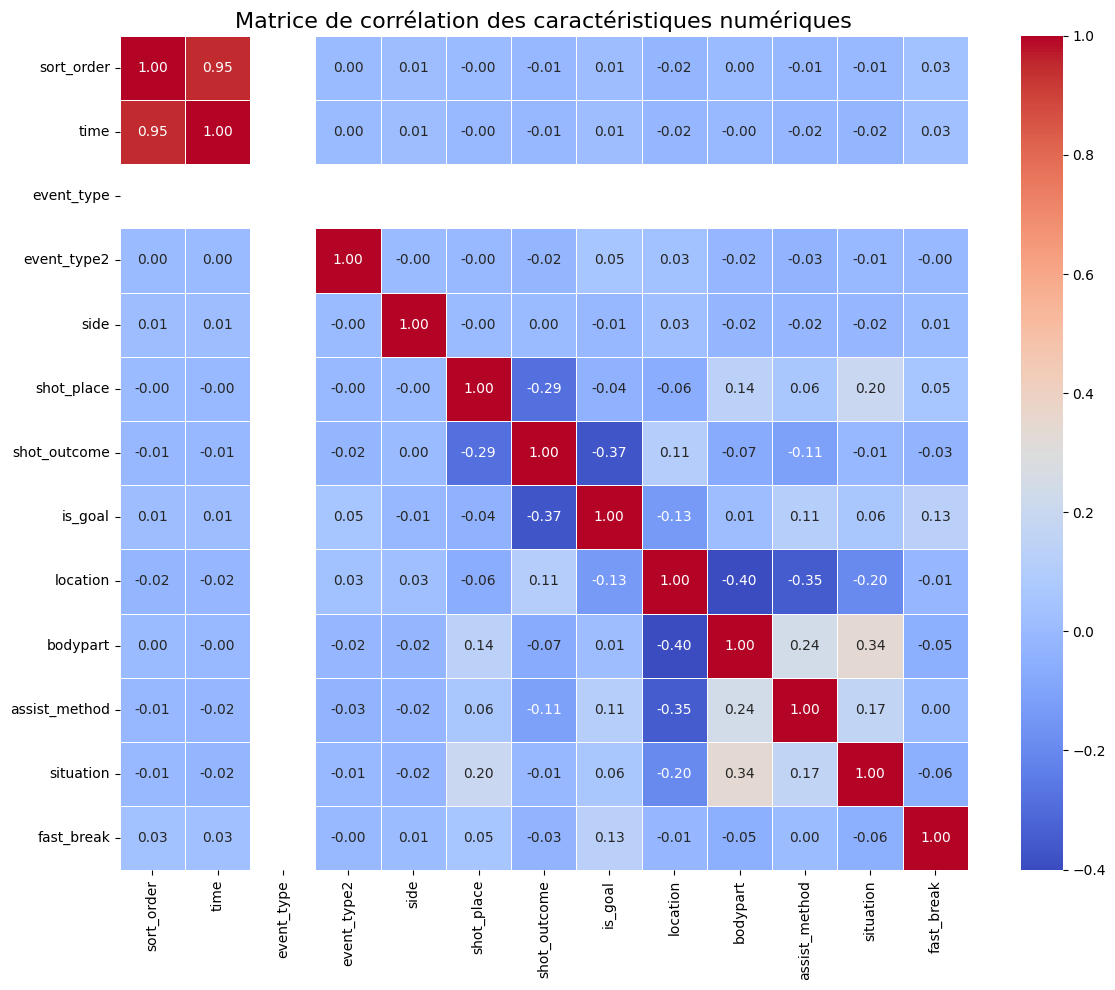

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculez la matrice de corrélation de la DataFrame `df_numeric`
correlation_matrix = df_numeric.corr()

# 3. Créez une figure et des axes pour le graphique
plt.figure(figsize=(12, 10)) # Adjust figure size for better readability

# 4. Générez une carte de chaleur (heatmap) de la `correlation_matrix`
# 5. Assurez-vous que les annotations des valeurs de corrélation sont affichées
# 6. Ajoutez une barre de couleur à la carte de chaleur (default behavior of sns.heatmap)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# 7. Ajoutez un titre descriptif à la carte de chaleur
plt.title('Matrice de corrélation des caractéristiques numériques', fontsize=16)

# 8. Ajustez la mise en page pour éviter le chevauchement des étiquettes
plt.tight_layout()

# 9. Affichez la carte de chaleur
plt.show()

## Générer les courbes de régression

### Subtask:
Créer des courbes de régression pour les paires de variables numériques jugées intéressantes afin de visualiser leurs relations et tendances.


**Reasoning**:
I need to choose a pair of highly correlated numerical variables (e.g., 'sort_order' and 'time') from `df_numeric` and visualize their relationship using a regression plot as instructed, which involves creating a figure, using `seaborn.regplot`, and adding appropriate labels and a title.



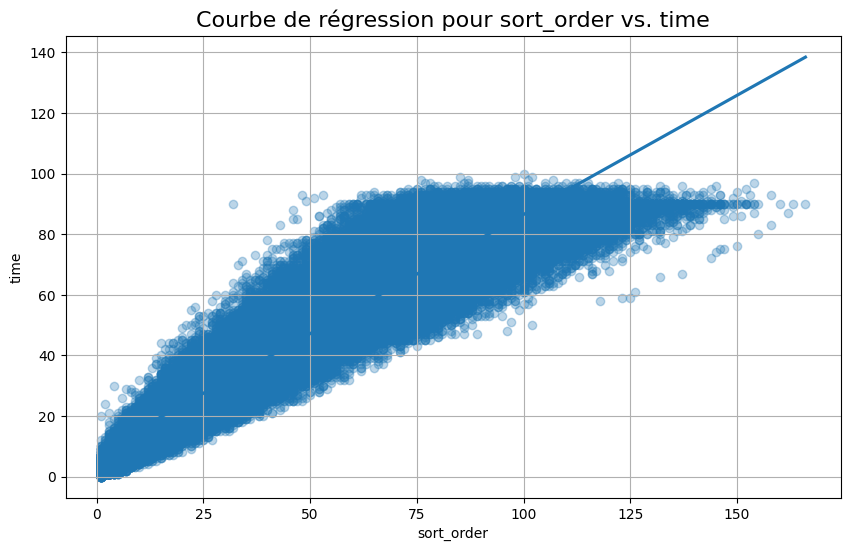

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Choose a pair of numerical variables with notable correlation
# From the correlation matrix, 'sort_order' and 'time' have a high correlation.
x_var = 'sort_order'
y_var = 'time'

# 2. Create a figure and an axis for the regression plot
plt.figure(figsize=(10, 6))

# 3. Use seaborn.regplot() to generate a scatter plot with a linear regression line
sns.regplot(x=x_var, y=y_var, data=df_numeric, scatter_kws={'alpha':0.3})

# 4. Add a descriptive title to the plot
plt.title(f'Courbe de régression pour {x_var} vs. {y_var}', fontsize=16)

# 5. Add labels for the x-axis and y-axis
plt.xlabel(x_var)
plt.ylabel(y_var)

# 6. Display the plot
plt.grid(True)
plt.show()


**Reasoning**:
The subtask asks to create regression curves for 'interesting pairs of variables'. I have already created one regression plot for 'sort_order' and 'time'. To further address the subtask and visualize another interesting relationship, I will choose 'shot_outcome' and 'is_goal' as they show a notable negative correlation (-0.47) in the correlation matrix, which could be insightful given that 'is_goal' is a binary variable.



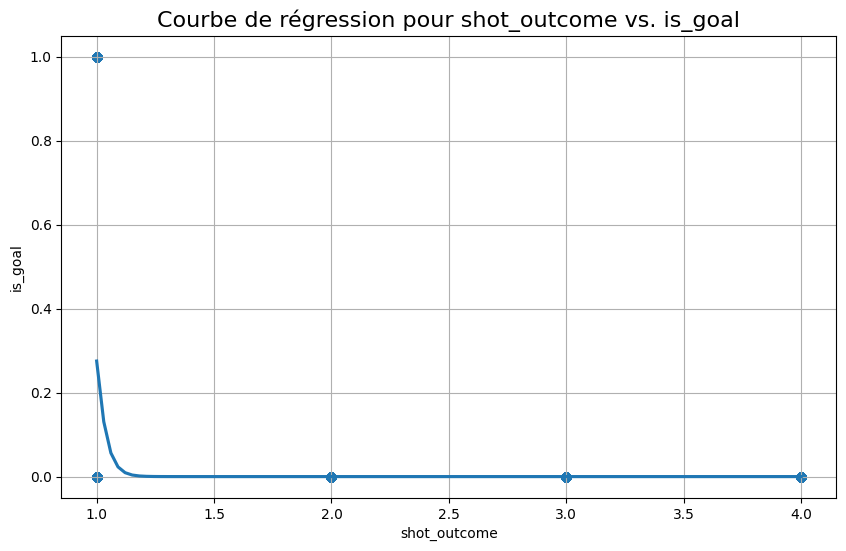

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose another pair of numerical variables with notable correlation
# From the correlation matrix, 'shot_outcome' and 'is_goal' have a correlation of -0.47.
x_var_2 = 'shot_outcome'
y_var_2 = 'is_goal'

# Create a figure and an axis for the regression plot
plt.figure(figsize=(10, 6))

# Use seaborn.regplot() to generate a scatter plot with a linear regression line
# For binary dependent variables, a logistic regression might be more appropriate, but regplot still shows the linear trend.
sns.regplot(x=x_var_2, y=y_var_2, data=df_numeric, scatter_kws={'alpha':0.3}, logistic=True)

# Add a descriptive title to the plot
plt.title(f'Courbe de régression pour {x_var_2} vs. {y_var_2}', fontsize=16)

# Add labels for the x-axis and y-axis
plt.xlabel(x_var_2)
plt.ylabel(y_var_2)

# Display the plot
plt.grid(True)
plt.show()